In [1]:
__author__ = 'Erwin Chen'
# %matplotlib nbagg
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
import numpy as np

In [2]:
# load data from fits file
hdulist = fits.open('allStar-v603.fits')
hdulist.info()
tbdata = hdulist[1].data
# APOGEE ID for stars
apogee_ID = tbdata.field('APOGEE_ID')
# Galactic Longitude
l = tbdata.field('GLON')
# Galactic Latitude 
b = tbdata.field('GLAT')
# Right Ascension(J2000)
RA = tbdata.field('RA')
# Declination(J2000)
DEC = tbdata.field('DEC')
# Heliocentric radial velocity
RV = tbdata.field('VHELIO_AVG')
# J, H, K
J = tbdata.field('J')
H = tbdata.field('H')
K = tbdata.field('K')
# log g
LOGG = tbdata.field('LOGG')
# Effective Temperature
TEFF = tbdata.field('TEFF')
# Proper Motion
PMRA = tbdata.field('PMRA')
PMDEC = tbdata.field('PMDEC')
# 15 elements
elements = np.array(["Al", "Ca", "C", "Fe", "K", "Mg", "Mn", "Na", "Ni", "N", "O", "Si", "S", "Ti", "V"])
AL_H = tbdata.field("AL_H")
CA_H = tbdata.field("CA_H")
C_H = tbdata.field("C_H")
FE_H = tbdata.field('FE_H')
K_H = tbdata.field("K_H")
MG_H = tbdata.field("MG_H")
MN_H = tbdata.field("MN_H")
NA_H = tbdata.field("NA_H")
NI_H = tbdata.field("NI_H")
N_H = tbdata.field("N_H")
O_H = tbdata.field("O_H")
SI_H = tbdata.field("SI_H")
S_H = tbdata.field("S_H")
TI_H = tbdata.field("TI_H")
V_H = tbdata.field("V_H")
# errors for 15 elements
AL_H_ERR = tbdata.field("AL_H_ERR")
CA_H_ERR = tbdata.field("CA_H_ERR")
C_H_ERR = tbdata.field("C_H_ERR")
FE_H_ERR = tbdata.field("FE_H_ERR")
K_H_ERR = tbdata.field("K_H_ERR")
MG_H_ERR = tbdata.field("MG_H_ERR")
MN_H_ERR = tbdata.field("MN_H_ERR")
NA_H_ERR = tbdata.field("NA_H_ERR")
NI_H_ERR = tbdata.field("NI_H_ERR")
N_H_ERR = tbdata.field("N_H_ERR")
O_H_ERR = tbdata.field("O_H_ERR")
SI_H_ERR = tbdata.field("SI_H_ERR")
S_H_ERR = tbdata.field("S_H_ERR")
TI_H_ERR = tbdata.field("TI_H_ERR")
V_H_ERR = tbdata.field("V_H_ERR")

Filename: allStar-v603.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      15   ()              
1                BinTableHDU    324   163278R x 151C   [45A, 34A, 44A, 34A, 18A, 8A, I, 16A, E, E, E, E, E, E, D, D, D, D, J, J, 116A, J, I, E, J, 129A, J, 59A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 2E, 2E, 2E, 2E, 5A, 6A, 4A, I, 7E, 7E, 49E, 49E, 15E, 15E, 15E, 15E, E, E, E, E, E, E, E, E, E, 2A, J, 153A, 7J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, 15E, 15J, 18A, 12A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 17A, E, E, I, I, E, E, 20A, 737A, 665A, 50J, 50J]   
2                ImageHDU         6   (360,)       int32   
3                BinTableHDU     31   1R x 4C      [105A, 30A, 90A, 15I]   


In [3]:
# get chemical abundances of 15 elements for all available stars
def get_matrix_all():
    # get stars with valid info
    C = np.where(
        (LOGG > -9999.) * (TEFF > -9999.) * (RV < 999999.0) *
        (AL_H > -9999.) * (CA_H > -9999.) * (C_H > -9999.0) *
        (FE_H > -9999.) * (K_H > -9999.0) * (MG_H > - 9999.0) *
        (MN_H > -9999.) * (NA_H > -9999.0) * (NI_H > -9999.) *
        (N_H > -9999.) * (O_H > -9999.0) * (SI_H > -9999.) *
        (S_H > -9999.) * (TI_H > -9999.) * (V_H > -9999.))[0]
    data = []
    data.append(C_H[C])
    data.append(FE_H[C])
    data.append(N_H[C])
    data.append(O_H[C])
    data.append(MG_H[C])
    data.append(SI_H[C])
    data.append(NI_H[C])
    data.append(AL_H[C])
    data.append(CA_H[C])
    data.append(MN_H[C])
    data.append(NA_H[C])
    data.append(S_H[C])
    data.append(K_H[C])
    data.append(TI_H[C])
    data.append(V_H[C])
    data = np.array(data)
    data = data.T
    return data

# get chemical abundances of 15 elements for selected stars
def get_matrix(C):
    data = []
    data.append(C_H[C])
    data.append(FE_H[C])
    data.append(N_H[C])
    data.append(O_H[C])
    data.append(MG_H[C])
    data.append(SI_H[C])
    data.append(NI_H[C])
    data.append(AL_H[C])
    data.append(CA_H[C])
    data.append(MN_H[C])
    data.append(NA_H[C])
    data.append(S_H[C])
    data.append(K_H[C])
    data.append(TI_H[C])
    data.append(V_H[C])
    data = np.array(data)
    data = data.T
    return data

# plot chemical abundance
def plot_chem(stars, title):
    # get stars with all 15 elements
    C = np.where(
            (LOGG > -9999.) * (TEFF > -9999.) * (RV < 999999.0) *
            (AL_H > -9999.) * (CA_H > -9999.) * (C_H > -9999.0) *
            (FE_H > -9999.) * (K_H > -9999.0) * (MG_H > - 9999.0) *
            (MN_H > -9999.) * (NA_H > -9999.0) * (NI_H > -9999.) *
            (N_H > -9999.) * (O_H > -9999.0) * (SI_H > -9999.) *
            (S_H > -9999.) * (TI_H > -9999.) * (V_H > -9999.))[0]
    # get members with all 15 elements
    stars = np.intersect1d(C, stars)
    # get data matrix
    data = get_matrix(stars)
    # plot chemical abundance
    f, ax = plt.subplots()
    x = range(1,16)
    for n in range(stars.size):
        ax.plot(x, data[n])
    ax.set_title(title)
    ax.set_xlabel("elements")
    ax.set_ylabel("chemical abundance")
    ax.set_xticks(x)
    ax.set_xticklabels(elements, x=x)
    ax.set_ylim(-2.5, 1)
    plt.show()

In [4]:
# load known members
known_clusters = np.loadtxt('table4.dat', usecols=(0, 1), dtype=('S', 'S'), unpack=True)
# names of all known clusters
known_clusters_names = known_clusters[1]
# M92, M15, M53, N5466, M2, M13, M3, M5, M107, M71, N2158, N2420, N188, M67, Pleiades, N6819, N6791
# APOGEE IDs for all known members
known_clusters_ID = known_clusters[0]
# get all known members
members = np.array([np.where(ID == apogee_ID)[0][0] for ID in known_clusters_ID])

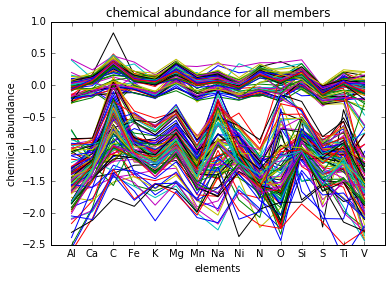

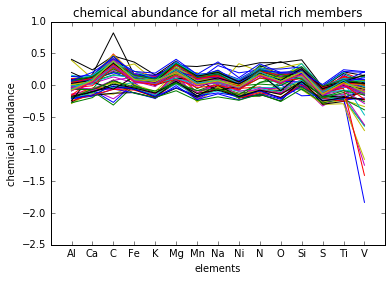

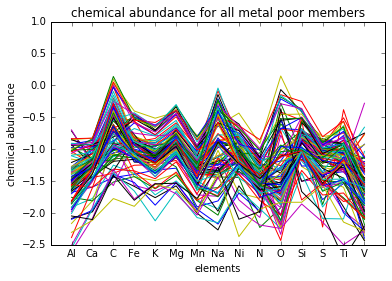

In [5]:
# get metal rich and metal poor stars
m_rich = members[np.where(FE_H[members]>-0.5)[0]]
m_poor = members[np.where(FE_H[members]<-0.5)[0]]
# plot chemical abundances for all members
plot_chem(members, "chemical abundance for all members")
# plot chemical abundances for metal rich stars
plot_chem(m_rich, "chemical abundance for all metal rich members")
# plot chemical abundances for metal poor stars
plot_chem(m_poor, "chemical abundance for all metal poor members")

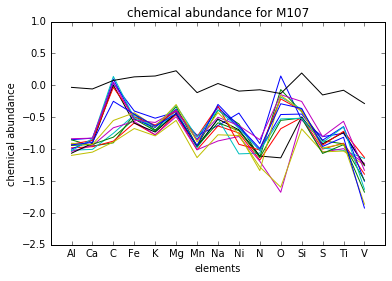

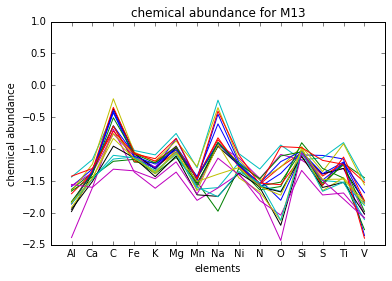

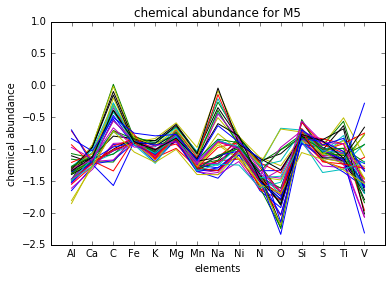

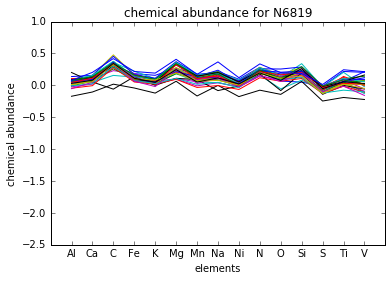

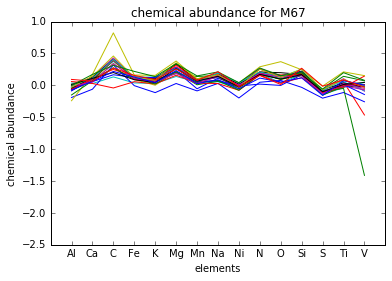

In [6]:
clusters_names = np.array(["M107", "M13", "M5", "N6819", "M67"])
for name in clusters_names:
    # get members of a known cluster
    name_members_ID = known_clusters_ID[np.where(name == known_clusters_names)]
    name_members = np.array([np.where(ID == apogee_ID)[0][0] for ID in name_members_ID])
    plot_chem(name_members, "chemical abundance for %s"%name)

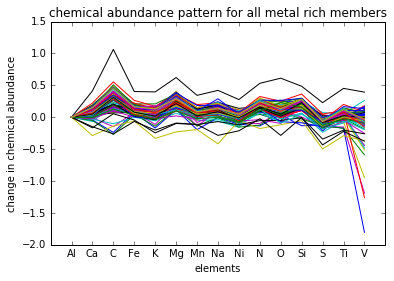

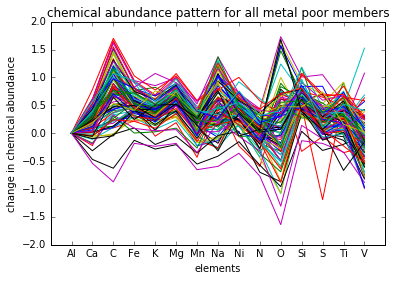

In [7]:
# plot chemical abundance pattern in change
def plot_chem_pattern(stars, title):
    # get stars with all 15 elements
    C = np.where(
            (LOGG > -9999.) * (TEFF > -9999.) * (RV < 999999.0) *
            (AL_H > -9999.) * (CA_H > -9999.) * (C_H > -9999.0) *
            (FE_H > -9999.) * (K_H > -9999.0) * (MG_H > - 9999.0) *
            (MN_H > -9999.) * (NA_H > -9999.0) * (NI_H > -9999.) *
            (N_H > -9999.) * (O_H > -9999.0) * (SI_H > -9999.) *
            (S_H > -9999.) * (TI_H > -9999.) * (V_H > -9999.))[0]
    # get members with all 15 elements
    stars = np.intersect1d(C, stars)
    # get data matrix
    # get chemical abundances of 15 elements for selected stars
    pattern = []
    pattern.append(C_H[stars] - C_H[stars])
    pattern.append(FE_H[stars] - C_H[stars])
    pattern.append(N_H[stars] - C_H[stars])
    pattern.append(O_H[stars] - C_H[stars])
    pattern.append(MG_H[stars] - C_H[stars])
    pattern.append(SI_H[stars] - C_H[stars])
    pattern.append(NI_H[stars] - C_H[stars])
    pattern.append(AL_H[stars] - C_H[stars])
    pattern.append(CA_H[stars] - C_H[stars])
    pattern.append(MN_H[stars] - C_H[stars])
    pattern.append(NA_H[stars] - C_H[stars])
    pattern.append(S_H[stars] - C_H[stars])
    pattern.append(K_H[stars] - C_H[stars])
    pattern.append(TI_H[stars] - C_H[stars])
    pattern.append(V_H[stars] - C_H[stars])
    pattern = np.array(pattern)
    pattern = pattern.T
    # plot chemical abundance
    f, ax = plt.subplots()
    x = range(1,16)
    for n in range(stars.size):
        ax.plot(x, pattern[n])
    ax.set_title(title)
    ax.set_xlabel("elements")
    ax.set_ylabel("change in chemical abundance")
    ax.set_xticks(x)
    ax.set_xticklabels(elements, x=x)
    plt.show()
    
# plot chemical abundances for metal rich stars
plot_chem_pattern(m_rich, "chemical abundance pattern for all metal rich members")
# plot chemical abundances for metal poor stars
plot_chem_pattern(m_poor, "chemical abundance pattern for all metal poor members")

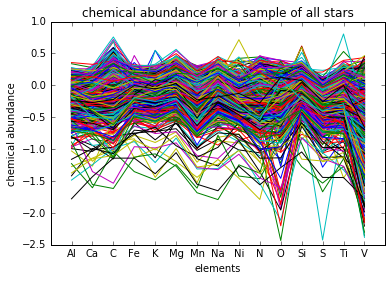

In [8]:
# chemical abundance for a sample of all stars
all_stars = np.where(
            (LOGG > -9999.) * (TEFF > -9999.) * (RV < 999999.0) *
            (AL_H > -9999.) * (CA_H > -9999.) * (C_H > -9999.0) *
            (FE_H > -9999.) * (K_H > -9999.0) * (MG_H > - 9999.0) *
            (MN_H > -9999.) * (NA_H > -9999.0) * (NI_H > -9999.) *
            (N_H > -9999.) * (O_H > -9999.0) * (SI_H > -9999.) *
            (S_H > -9999.) * (TI_H > -9999.) * (V_H > -9999.))[0]
sample = np.random.random_integers(0, all_stars.size, 2000)
plot_chem(sample, "chemical abundance for a sample of all stars")
